In [1]:
from pycocotools.coco import COCO
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt

In [2]:
coco_dataset_path = "/home/kafkaon1/Dev/data/COCO_2702/train_imgs"
coco = COCO('/home/kafkaon1/Dev/data/COCO_2702/annotations_train.json')

ann_ids = coco.getAnnIds(iscrowd=False)
anns = coco.loadAnns(ann_ids)
anns = [ann for ann in anns if len(ann['segmentation']) > 0]


loading annotations into memory...
Done (t=0.67s)
creating index...
index created!


In [3]:
len(anns)

9435

In [10]:
bbox

array([543., 215., 552., 220.])

In [21]:
    segs

[[547,
  215,
  546,
  216,
  543,
  216,
  543,
  220,
  547,
  220,
  548,
  219,
  552,
  219,
  552,
  216,
  550,
  216,
  549,
  215]]

BBox[0] (xyxy): [104.0, 157.0, 754.0, 279.0]
/home/kafkaon1/Dev/data/COCO_2702/train_imgs/new_new_IMG_3644.jpeg
(1, 168, 2)


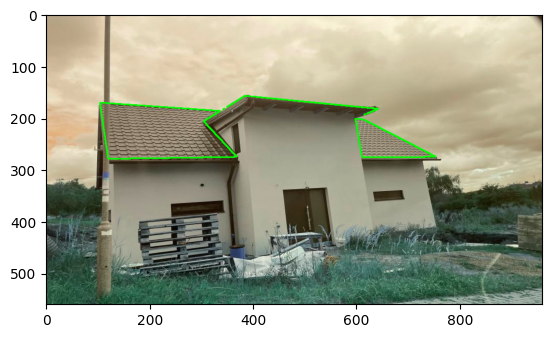

In [3]:

for i, ann in enumerate(anns[150:]):
    image_id = ann["image_id"]
    segs = ann["segmentation"]
    bbox = np.array(ann["bbox"])
    bbox[2:4] = bbox[0:2] + bbox[2:4]
    print("BBox[{}] (xyxy):".format(i), bbox.tolist())
    
    image_info = coco.loadImgs(image_id)
    image_path = image_info[0]["file_name"]
    # [0] is required, always return a list
    image_path = os.path.join(coco_dataset_path, image_path)
    print(image_path)

    image = cv2.imread(image_path)
    segs = [np.array(seg, np.int32).reshape((1, -1, 2))
            for seg in segs]
    print(segs[0].shape)
    for seg in segs: cv2.drawContours(image, seg, -1, (0,255,0), 2)
    # third aug -1 means draw all contours in 3-D array, Or
    # for seg in segs: cv2.fillPoly(image, segm, (0,255,0))
    # cv2.rectangle(image, (int(bbox[0]), int(bbox[1])), 
    #               (int(bbox[2]), int(bbox[3])), (0,0,255), 2)
    plt.imshow(image)

    break

In [ ]:
min_area_threshold=4000
arc_length_coeff=0.005

polygon_area = -1
polygon_vertices = None
contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
for cnt in contours:
    epsilon = arc_length_coeff * cv2.arcLength(cnt, True)
    approx = cv2.approxPolyDP(cnt, epsilon, True)
    area = cv2.contourArea(approx)

    if len(approx) >= 3 and area > min_area_threshold:
        # self.show_detected_area(image, approx)
        if polygon_area < area:
            polygon_area = area
            # convex_hull = cv2.convexHull(approx.reshape(-1, 2).astype(dtype=np.float32))
            # convex_hull_points = convex_hull.reshape(-1, 2).astype(np.float32)
            # epsilon = 0.01 * cv2.arcLength(convex_hull_points, True)
            # approx = cv2.approxPolyDP(convex_hull_points, epsilon, True)
            polygon_vertices = approx.reshape(-1, 2).astype(np.float32)


In [2]:
# load images test_r.png and test_t.png and display them
import cv2
import numpy as np
import matplotlib.pyplot as plt
from torch.nn.functional import sigmoid

import torch
import sys
sys.path.append('..')
%reload_ext autoreload
%autoreload 2
import models

/home/kafkaon1/miniconda3/envs/mlenv/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [45]:
ckpt = torch.load('/home/kafkaon1/Dev/out/train/SolAR_KPdet/0319_062836/best_ckpt_ep8.pth', map_location='cuda:1')
model = models.MaxVitUnet()
model.load_state_dict(ckpt['state_dict'])

<All keys matched successfully>

In [8]:
from parse_config import ConfigParser
import argparse
import dataset as data_module   
from utils import read_json, write_json, setup_logging

config = read_json('/home/kafkaon1/Dev/FVAPP/configs/config_kp.json')

config = ConfigParser(config, None)

train_loader = config.init_obj('train_data_loader', data_module)
valid_loader = config.init_obj('val_data_loader', data_module)


In [33]:
tst = valid_loader.dataset[0][0].unsqueeze(0)

In [46]:
out = model(tst)

In [47]:
out = torch.sigmoid(out)

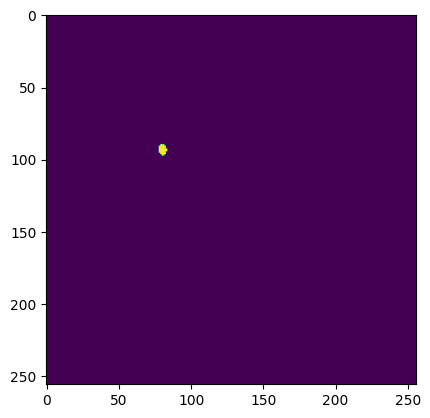

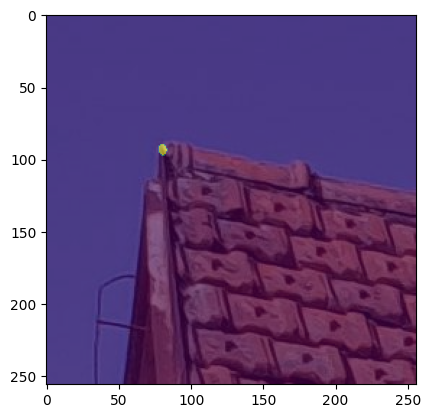

In [51]:
plt.imshow(valid_loader.dataset[0][0].permute(1,2,0).detach().cpu().numpy())
plt.imshow(out[0, 0].detach().cpu().numpy()>0.6, alpha = 0.6)

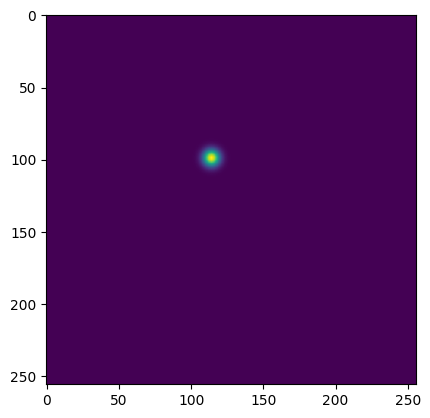

In [28]:
plt.imshow(train_loader.dataset[0][1][0].detach().cpu().numpy())